In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [15]:
def policy_func(beta,m):
    '''
    beta is a constant parameter
    m is an array of how many action variables do we have.
    
    return p which is an array of the probability for each action variable
    
    '''
    total_sum=np.sum( np.exp(beta*m_i) for m_i in m )
    p=[np.exp(beta*m_i)/total_sum for m_i in m]
    return p
    
    

In [16]:
def reward_func(r_prob, reward_value):
    '''
    the r_prob is an array of the reward probability, so if we have two reward and the first can be 0.25 and the second 0.05
    
    the return is an array of the reward_value multiplied by zero for the abscence of the reward or 1 when the reward is present, that will be drawn from a uniform distribution I think
    the return r is an array of zeros or ones
    '''
    
    r=np.zeros(len(r_prob))
    
    for i,probability in enumerate(r_prob):
        
        r[i]=  1 if random.random() < probability else 0
    return r*reward_value


    

In [17]:
def choose_action(policies):
    '''
    This function chooses which action given their higher probabilities in the policy function
    '''
    
    action=np.random.choice([0, 1],p=policies)
    return action




In [18]:
def update_action_variable(action_choice,m,alpha,delta):
    '''
    action_choice is the action choice, 0 is the left and 1 is the right if there are two values only. 
    alpha is the learning rate, 
    
    delta is the error array for all action variables
    This is to only update its corresponding m 
    '''
    
    
    m[action_choice]=m[action_choice]+alpha*delta[action_choice]
    return m
    
    
    
    

In [19]:
def delta_error(rewards,m):
    # This function in general calculates the delta error between all actions and rewards. 
    return [x - y for x, y in zip(rewards, m)]

In [20]:
def indirect_actor(beta,r_prob,n_trials,num_actions,alpha,reward_value): 
    # initialize the action vectors with very small values like 0.1.
    # the reason is that we need easier switching behavior, if one of the actions
    # starts at 0, it's still difficult for the other action to reduce it's probability that much for switching. 
    # so it'll be dominant even though the reward is switched. 
    m=np.zeros((num_actions,n_trials+1))
    
    action_hist=np.zeros((num_actions,n_trials))
    policy_hist=np.zeros((num_actions,n_trials))
    
    for trial in range(n_trials):
        
        policies=policy_func(beta,m[:,trial])
        policy_hist[:,trial]=policies
        action_choice=choose_action(policies)
        action_hist[action_choice,trial]=1
        rewards=reward_func(r_prob, reward_value) # this takes the probability reward and its value which is usually 1
        delta=delta_error(rewards,m[:,trial])
        m[:,trial+1]=update_action_variable(action_choice,m[:,trial],alpha,delta)
        
        if trial==100:
            r_prob=np.flip(r_prob) # fliping once we got to t=100, for all timef
    return m,action_hist,policy_hist

In [21]:
beta=10
r_prob=[0.05 ,0.25]
n_trials=200
num_actions=2
alpha=0.1
reward_value=1
m,action_hist,policy_hist=indirect_actor(beta,r_prob,n_trials,num_actions,alpha,reward_value)



/var/folders/jq/bnhdr3191qx3y7b5tw2sztvr0000gn/T/ipykernel_51743/237373135.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_sum=np.sum( np.exp(beta*m_i) for m_i in m )


(0.0, 0.5)

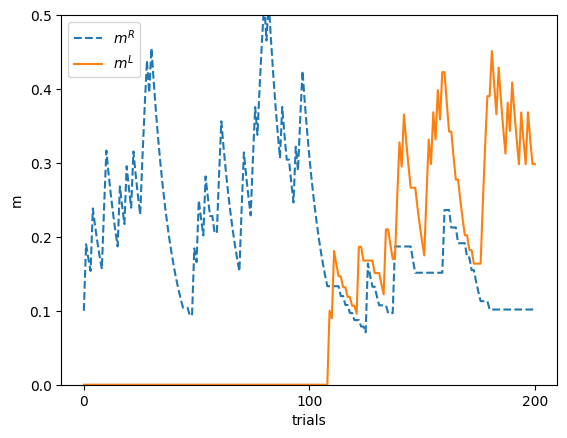

In [43]:
plt.plot(m[1,:],'--',label=r'$m^R$')
plt.plot(m[0,:],'-',label=r'$m^L$')
plt.xlabel("trials")
plt.ylabel("m")
plt.legend()
plt.xticks([0,100,200])
plt.ylim(0,0.5)

In [23]:
N=10000
alpha_list=[0.1,0.5]
ensemble=np.zeros((2,n_trials+1,N,len(alpha_list)))
policy_ensemble=np.zeros((2,n_trials,N,len(alpha_list)))

for i in range(N):
    for j,alpha in enumerate(alpha_list):
        ensemble[:,:,i,j],action_hist,policy_ensemble[:,:,i,j]=indirect_actor(beta,r_prob,n_trials,num_actions,alpha,reward_value)


/var/folders/jq/bnhdr3191qx3y7b5tw2sztvr0000gn/T/ipykernel_51743/237373135.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_sum=np.sum( np.exp(beta*m_i) for m_i in m )


In [24]:
ensemble_avg=np.mean(ensemble, axis=2)
policy_ensemble_avg=np.mean(policy_ensemble,axis=2)

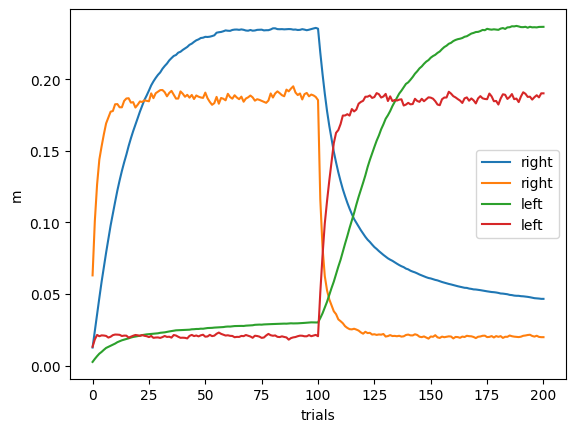

In [25]:
plt.plot(ensemble_avg[1,:],label='right')
plt.plot(ensemble_avg[0,:],label='left')
plt.xlabel("trials")
plt.ylabel("m")
plt.legend()

([<matplotlib.axis.XTick at 0x157671450>,
 [Text(0, 0, '0'), Text(100, 0, '100'), Text(200, 0, '200')])

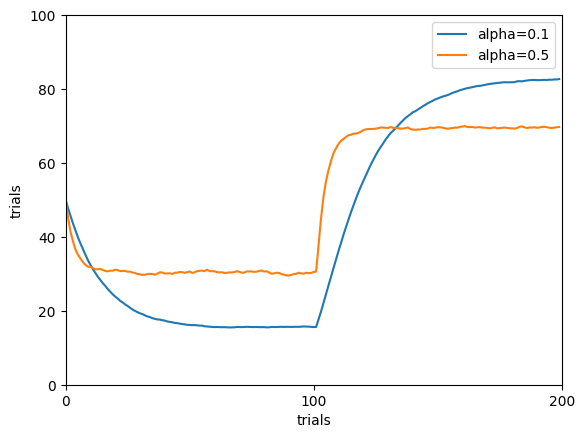

In [49]:


plt.plot(100*policy_ensemble_avg[0,:])
plt.ylabel('Percentage of the choice of L')
plt.ylabel('trials')
plt.legend(['alpha=0.1','alpha=0.5'])
plt.xlabel('trials')
plt.ylim(0,100)
plt.xlim(0,200)
# tick x-axis 0,100,200
plt.xticks([0,100,200])


(2, 200, 2)


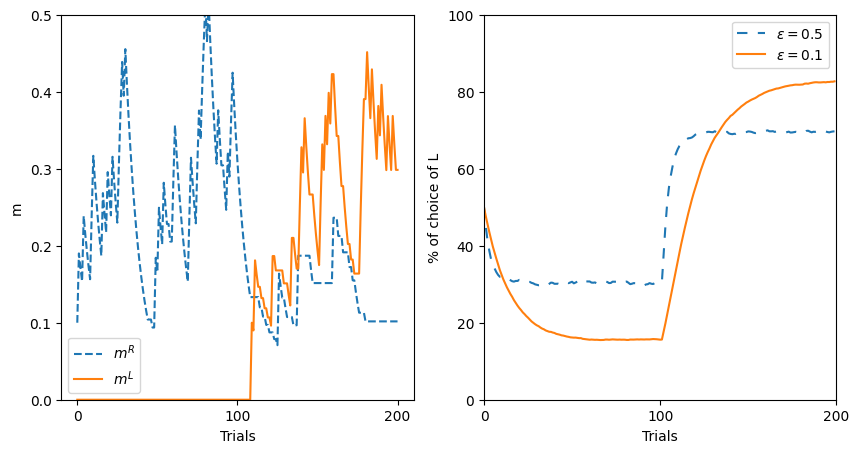

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot m[1,:] and m[0,:]
axes[0].plot(m[1, :], '--', label=r'$m^R$')
axes[0].plot(m[0, :], '-', label=r'$m^L$')
axes[0].set_xlabel('Trials')
axes[0].set_ylabel('m')
axes[0].legend()
axes[0].set_xticks([0, 100, 200])
axes[0].set_ylim(0, 0.5)

# Plot 100*policy_ensemble_avg[0,:]
axes[1].plot(100*policy_ensemble_avg[0,:,1], '--' ,dashes=(5, 5), label=r'$\epsilon=0.5$')
axes[1].plot(100*policy_ensemble_avg[0,:,0],label=r'$\epsilon=0.1$')
# make the alpha -.5 dotted
#axes[1].plot(100*policy_ensemble_avg[1,:], '--')
# ylabel is % of choice of L in latex
axes[1].set_ylabel('% of choice of L')  
axes[1].set_xlabel('Trials')
axes[1].set_ylim(0, 100)
axes[1].set_xlim(0, 200)
axes[1].legend()
axes[1].set_xticks([0, 100, 200])


print(policy_ensemble_avg.shape)

# save figure with indirect actor 
fig.savefig('indirect_actor.png', dpi=300, bbox_inches='tight')